In [1]:
import torch
import utils
import dataset
from model import Model
import train

In [2]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

train_loader = dataset.get_train_data_loader(**dataloader_args)
test_loader = dataset.get_test_data_loader(**dataloader_args)

CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

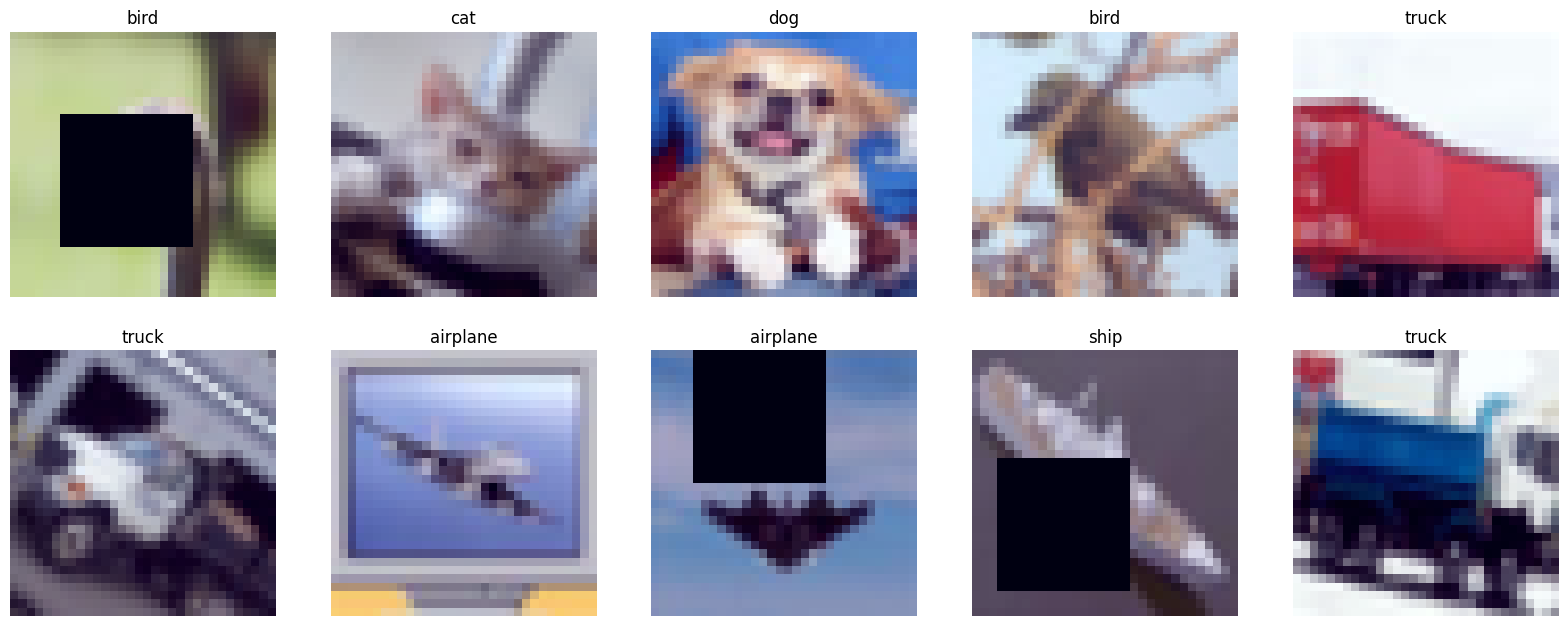

In [3]:
utils.plot_samples(train_loader)

In [4]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Model().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,304
              ReLU-6           [-1, 16, 32, 32]               0
       BatchNorm2d-7           [-1, 16, 32, 32]              32
           Dropout-8           [-1, 16, 32, 32]               0
            Conv2d-9           [-1, 16, 30, 30]           2,304
             ReLU-10           [-1, 16, 30, 30]               0
      BatchNorm2d-11           [-1, 16, 30, 30]              32
          Dropout-12           [-1, 16, 30, 30]               0
           Conv2d-13           [-1, 32, 30, 30]           4,608
             ReLU-14           [-1

In [5]:
model = Model().to(device)
optimizer = utils.get_SGD_optimizer(model, lr=0.02, momentum=0.9)
scheduler = utils.get_StepLR_scheduler(optimizer, step_size=150, gamma=0.1)
criterion = utils.get_criterion()
num_epoch = 75

train_losses, train_acc, test_losses, test_acc = train.start_training(
    num_epoch, model, device, train_loader, test_loader, optimizer, criterion,
    scheduler
)

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1


Train: Loss=1.7162 Batch_id=390 Accuracy=33.76: 100%|██████████| 391/391 [00:22<00:00, 17.47it/s]


Test set: Average loss: 1.5116, Accuracy: 4462/10000 (44.62%)

Epoch 2


Train: Loss=1.4815 Batch_id=390 Accuracy=43.85: 100%|██████████| 391/391 [00:17<00:00, 22.03it/s]


Test set: Average loss: 1.3093, Accuracy: 5273/10000 (52.73%)

Epoch 3


Train: Loss=1.3626 Batch_id=390 Accuracy=48.72: 100%|██████████| 391/391 [00:18<00:00, 20.80it/s]


Test set: Average loss: 1.1662, Accuracy: 5772/10000 (57.72%)

Epoch 4


Train: Loss=1.0554 Batch_id=390 Accuracy=52.60: 100%|██████████| 391/391 [00:17<00:00, 22.30it/s]


Test set: Average loss: 1.0514, Accuracy: 6215/10000 (62.15%)

Epoch 5


Train: Loss=1.1430 Batch_id=390 Accuracy=55.16: 100%|██████████| 391/391 [00:18<00:00, 20.96it/s]


Test set: Average loss: 0.9812, Accuracy: 6470/10000 (64.70%)

Epoch 6


Train: Loss=1.2122 Batch_id=390 Accuracy=57.32: 100%|██████████| 391/391 [00:17<00:00, 22.40it/s]


Test set: Average loss: 0.9366, Accuracy: 6722/10000 (67.22%)

Epoch 7


Train: Loss=1.2412 Batch_id=390 Accuracy=58.96: 100%|██████████| 391/391 [00:18<00:00, 21.64it/s]


Test set: Average loss: 0.8757, Accuracy: 6890/10000 (68.90%)

Epoch 8


Train: Loss=1.0137 Batch_id=390 Accuracy=60.53: 100%|██████████| 391/391 [00:18<00:00, 20.70it/s]


Test set: Average loss: 0.8366, Accuracy: 7067/10000 (70.67%)

Epoch 9


Train: Loss=0.9566 Batch_id=390 Accuracy=62.04: 100%|██████████| 391/391 [00:17<00:00, 22.14it/s]


Test set: Average loss: 0.8472, Accuracy: 7042/10000 (70.42%)

Epoch 10


Train: Loss=1.0954 Batch_id=390 Accuracy=62.88: 100%|██████████| 391/391 [00:18<00:00, 21.51it/s]


Test set: Average loss: 0.7690, Accuracy: 7313/10000 (73.13%)

Epoch 11


Train: Loss=1.2396 Batch_id=390 Accuracy=63.89: 100%|██████████| 391/391 [00:17<00:00, 22.06it/s]


Test set: Average loss: 0.7630, Accuracy: 7363/10000 (73.63%)

Epoch 12


Train: Loss=1.0567 Batch_id=390 Accuracy=64.82: 100%|██████████| 391/391 [00:18<00:00, 21.10it/s]


Test set: Average loss: 0.7361, Accuracy: 7449/10000 (74.49%)

Epoch 13


Train: Loss=0.8463 Batch_id=390 Accuracy=65.55: 100%|██████████| 391/391 [00:17<00:00, 21.86it/s]


Test set: Average loss: 0.7106, Accuracy: 7552/10000 (75.52%)

Epoch 14


Train: Loss=1.1188 Batch_id=390 Accuracy=66.27: 100%|██████████| 391/391 [00:18<00:00, 21.18it/s]


Test set: Average loss: 0.7014, Accuracy: 7588/10000 (75.88%)

Epoch 15


Train: Loss=1.0696 Batch_id=390 Accuracy=66.92: 100%|██████████| 391/391 [00:17<00:00, 22.14it/s]


Test set: Average loss: 0.6915, Accuracy: 7626/10000 (76.26%)

Epoch 16


Train: Loss=0.8590 Batch_id=390 Accuracy=67.41: 100%|██████████| 391/391 [00:19<00:00, 20.42it/s]


Test set: Average loss: 0.6438, Accuracy: 7762/10000 (77.62%)

Epoch 17


Train: Loss=0.9428 Batch_id=390 Accuracy=67.60: 100%|██████████| 391/391 [00:17<00:00, 22.05it/s]


Test set: Average loss: 0.6696, Accuracy: 7693/10000 (76.93%)

Epoch 18


Train: Loss=0.9588 Batch_id=390 Accuracy=68.47: 100%|██████████| 391/391 [00:18<00:00, 21.04it/s]


Test set: Average loss: 0.6319, Accuracy: 7824/10000 (78.24%)

Epoch 19


Train: Loss=0.9859 Batch_id=390 Accuracy=68.68: 100%|██████████| 391/391 [00:19<00:00, 20.52it/s]


Test set: Average loss: 0.6070, Accuracy: 7931/10000 (79.31%)

Epoch 20


Train: Loss=0.9983 Batch_id=390 Accuracy=68.88: 100%|██████████| 391/391 [00:18<00:00, 20.88it/s]


Test set: Average loss: 0.6081, Accuracy: 7918/10000 (79.18%)

Epoch 21


Train: Loss=0.9462 Batch_id=390 Accuracy=69.25: 100%|██████████| 391/391 [00:17<00:00, 22.58it/s]


Test set: Average loss: 0.6196, Accuracy: 7867/10000 (78.67%)

Epoch 22


Train: Loss=1.0427 Batch_id=390 Accuracy=69.61: 100%|██████████| 391/391 [00:18<00:00, 21.18it/s]


Test set: Average loss: 0.5978, Accuracy: 7992/10000 (79.92%)

Epoch 23


Train: Loss=0.9019 Batch_id=390 Accuracy=70.13: 100%|██████████| 391/391 [00:17<00:00, 22.66it/s]


Test set: Average loss: 0.5733, Accuracy: 8055/10000 (80.55%)

Epoch 24


Train: Loss=0.6569 Batch_id=390 Accuracy=70.56: 100%|██████████| 391/391 [00:18<00:00, 20.71it/s]


Test set: Average loss: 0.5794, Accuracy: 8021/10000 (80.21%)

Epoch 25


Train: Loss=0.8825 Batch_id=390 Accuracy=70.26: 100%|██████████| 391/391 [00:17<00:00, 22.54it/s]


Test set: Average loss: 0.5620, Accuracy: 8059/10000 (80.59%)

Epoch 26


Train: Loss=0.6786 Batch_id=390 Accuracy=70.64: 100%|██████████| 391/391 [00:18<00:00, 20.99it/s]


Test set: Average loss: 0.5731, Accuracy: 8042/10000 (80.42%)

Epoch 27


Train: Loss=0.9419 Batch_id=390 Accuracy=71.42: 100%|██████████| 391/391 [00:17<00:00, 22.42it/s]


Test set: Average loss: 0.5493, Accuracy: 8119/10000 (81.19%)

Epoch 28


Train: Loss=1.1358 Batch_id=390 Accuracy=71.32: 100%|██████████| 391/391 [00:18<00:00, 20.74it/s]


Test set: Average loss: 0.5383, Accuracy: 8150/10000 (81.50%)

Epoch 29


Train: Loss=0.8445 Batch_id=390 Accuracy=71.48: 100%|██████████| 391/391 [00:17<00:00, 22.39it/s]


Test set: Average loss: 0.5397, Accuracy: 8190/10000 (81.90%)

Epoch 30


Train: Loss=0.8401 Batch_id=390 Accuracy=71.63: 100%|██████████| 391/391 [00:19<00:00, 19.99it/s]


Test set: Average loss: 0.5250, Accuracy: 8217/10000 (82.17%)

Epoch 31


Train: Loss=0.8546 Batch_id=390 Accuracy=71.76: 100%|██████████| 391/391 [00:17<00:00, 22.41it/s]


Test set: Average loss: 0.5259, Accuracy: 8228/10000 (82.28%)

Epoch 32


Train: Loss=0.7799 Batch_id=390 Accuracy=72.22: 100%|██████████| 391/391 [00:18<00:00, 21.38it/s]


Test set: Average loss: 0.5031, Accuracy: 8284/10000 (82.84%)

Epoch 33


Train: Loss=0.8186 Batch_id=390 Accuracy=72.36: 100%|██████████| 391/391 [00:17<00:00, 22.28it/s]


Test set: Average loss: 0.5235, Accuracy: 8250/10000 (82.50%)

Epoch 34


Train: Loss=0.7783 Batch_id=390 Accuracy=72.44: 100%|██████████| 391/391 [00:18<00:00, 21.66it/s]


Test set: Average loss: 0.5241, Accuracy: 8250/10000 (82.50%)

Epoch 35


Train: Loss=0.9532 Batch_id=390 Accuracy=72.69: 100%|██████████| 391/391 [00:18<00:00, 21.37it/s]


Test set: Average loss: 0.5059, Accuracy: 8260/10000 (82.60%)

Epoch 36


Train: Loss=0.7455 Batch_id=390 Accuracy=72.96: 100%|██████████| 391/391 [00:17<00:00, 22.53it/s]


Test set: Average loss: 0.5013, Accuracy: 8290/10000 (82.90%)

Epoch 37


Train: Loss=0.5715 Batch_id=390 Accuracy=73.09: 100%|██████████| 391/391 [00:17<00:00, 22.28it/s]


Test set: Average loss: 0.4993, Accuracy: 8327/10000 (83.27%)

Epoch 38


Train: Loss=0.6999 Batch_id=390 Accuracy=73.08: 100%|██████████| 391/391 [00:17<00:00, 22.44it/s]


Test set: Average loss: 0.4885, Accuracy: 8329/10000 (83.29%)

Epoch 39


Train: Loss=0.7130 Batch_id=390 Accuracy=73.03: 100%|██████████| 391/391 [00:17<00:00, 22.52it/s]


Test set: Average loss: 0.4818, Accuracy: 8370/10000 (83.70%)

Epoch 40


Train: Loss=0.8696 Batch_id=390 Accuracy=73.26: 100%|██████████| 391/391 [00:17<00:00, 22.42it/s]


Test set: Average loss: 0.4788, Accuracy: 8365/10000 (83.65%)

Epoch 41


Train: Loss=0.8408 Batch_id=390 Accuracy=73.55: 100%|██████████| 391/391 [00:18<00:00, 21.14it/s]


Test set: Average loss: 0.4825, Accuracy: 8345/10000 (83.45%)

Epoch 42


Train: Loss=0.8698 Batch_id=390 Accuracy=73.75: 100%|██████████| 391/391 [00:17<00:00, 22.24it/s]


Test set: Average loss: 0.4719, Accuracy: 8429/10000 (84.29%)

Epoch 43


Train: Loss=0.8176 Batch_id=390 Accuracy=73.49: 100%|██████████| 391/391 [00:17<00:00, 22.72it/s]


Test set: Average loss: 0.4756, Accuracy: 8375/10000 (83.75%)

Epoch 44


Train: Loss=0.8419 Batch_id=390 Accuracy=73.66: 100%|██████████| 391/391 [00:17<00:00, 22.62it/s]


Test set: Average loss: 0.4721, Accuracy: 8368/10000 (83.68%)

Epoch 45


Train: Loss=0.8815 Batch_id=390 Accuracy=74.02: 100%|██████████| 391/391 [00:17<00:00, 22.58it/s]


Test set: Average loss: 0.4826, Accuracy: 8378/10000 (83.78%)

Epoch 46


Train: Loss=0.7588 Batch_id=390 Accuracy=73.96: 100%|██████████| 391/391 [00:18<00:00, 21.09it/s]


Test set: Average loss: 0.4764, Accuracy: 8397/10000 (83.97%)

Epoch 47


Train: Loss=0.7131 Batch_id=390 Accuracy=74.31: 100%|██████████| 391/391 [00:17<00:00, 21.73it/s]


Test set: Average loss: 0.4730, Accuracy: 8416/10000 (84.16%)

Epoch 48


Train: Loss=0.7509 Batch_id=390 Accuracy=74.67: 100%|██████████| 391/391 [00:17<00:00, 22.30it/s]


Test set: Average loss: 0.4691, Accuracy: 8430/10000 (84.30%)

Epoch 49


Train: Loss=0.7786 Batch_id=390 Accuracy=74.07: 100%|██████████| 391/391 [00:18<00:00, 20.89it/s]


Test set: Average loss: 0.4697, Accuracy: 8415/10000 (84.15%)

Epoch 50


Train: Loss=0.6208 Batch_id=390 Accuracy=74.74: 100%|██████████| 391/391 [00:19<00:00, 20.55it/s]


Test set: Average loss: 0.4506, Accuracy: 8483/10000 (84.83%)

Epoch 51


Train: Loss=0.6684 Batch_id=390 Accuracy=74.98: 100%|██████████| 391/391 [00:18<00:00, 20.60it/s]


Test set: Average loss: 0.4413, Accuracy: 8493/10000 (84.93%)

Epoch 52


Train: Loss=0.7188 Batch_id=390 Accuracy=74.80: 100%|██████████| 391/391 [00:18<00:00, 20.72it/s]


Test set: Average loss: 0.4524, Accuracy: 8459/10000 (84.59%)

Epoch 53


Train: Loss=0.7556 Batch_id=390 Accuracy=74.84: 100%|██████████| 391/391 [00:18<00:00, 21.48it/s]


Test set: Average loss: 0.4560, Accuracy: 8449/10000 (84.49%)

Epoch 54


Train: Loss=0.6456 Batch_id=390 Accuracy=74.83: 100%|██████████| 391/391 [00:17<00:00, 22.40it/s]


Test set: Average loss: 0.4650, Accuracy: 8433/10000 (84.33%)

Epoch 55


Train: Loss=0.7151 Batch_id=390 Accuracy=75.07: 100%|██████████| 391/391 [00:17<00:00, 21.76it/s]


Test set: Average loss: 0.4463, Accuracy: 8461/10000 (84.61%)

Epoch 56


Train: Loss=0.6696 Batch_id=390 Accuracy=75.17: 100%|██████████| 391/391 [00:17<00:00, 22.25it/s]


Test set: Average loss: 0.4539, Accuracy: 8451/10000 (84.51%)

Epoch 57


Train: Loss=0.7080 Batch_id=390 Accuracy=75.26: 100%|██████████| 391/391 [00:19<00:00, 20.58it/s]


Test set: Average loss: 0.4558, Accuracy: 8456/10000 (84.56%)

Epoch 58


Train: Loss=0.6368 Batch_id=390 Accuracy=75.36: 100%|██████████| 391/391 [00:18<00:00, 21.56it/s]


Test set: Average loss: 0.4405, Accuracy: 8507/10000 (85.07%)

Epoch 59


Train: Loss=0.5579 Batch_id=390 Accuracy=75.37: 100%|██████████| 391/391 [00:17<00:00, 22.40it/s]


Test set: Average loss: 0.4422, Accuracy: 8494/10000 (84.94%)

Epoch 60


Train: Loss=0.7456 Batch_id=390 Accuracy=75.64: 100%|██████████| 391/391 [00:17<00:00, 21.97it/s]


Test set: Average loss: 0.4458, Accuracy: 8468/10000 (84.68%)

Epoch 61


Train: Loss=0.7938 Batch_id=390 Accuracy=75.63: 100%|██████████| 391/391 [00:17<00:00, 22.13it/s]


Test set: Average loss: 0.4316, Accuracy: 8552/10000 (85.52%)

Epoch 62


Train: Loss=0.7390 Batch_id=390 Accuracy=75.53: 100%|██████████| 391/391 [00:18<00:00, 20.85it/s]


Test set: Average loss: 0.4465, Accuracy: 8482/10000 (84.82%)

Epoch 63


Train: Loss=0.7041 Batch_id=390 Accuracy=75.95: 100%|██████████| 391/391 [00:17<00:00, 21.79it/s]


Test set: Average loss: 0.4318, Accuracy: 8547/10000 (85.47%)

Epoch 64


Train: Loss=0.8725 Batch_id=390 Accuracy=76.02: 100%|██████████| 391/391 [00:18<00:00, 20.80it/s]


Test set: Average loss: 0.4231, Accuracy: 8564/10000 (85.64%)

Epoch 65


Train: Loss=0.6375 Batch_id=390 Accuracy=76.16: 100%|██████████| 391/391 [00:17<00:00, 21.94it/s]


Test set: Average loss: 0.4261, Accuracy: 8535/10000 (85.35%)

Epoch 66


Train: Loss=0.5413 Batch_id=390 Accuracy=75.85: 100%|██████████| 391/391 [00:18<00:00, 20.76it/s]


Test set: Average loss: 0.4213, Accuracy: 8575/10000 (85.75%)

Epoch 67


Train: Loss=0.5319 Batch_id=390 Accuracy=76.16: 100%|██████████| 391/391 [00:17<00:00, 21.86it/s]


Test set: Average loss: 0.4217, Accuracy: 8554/10000 (85.54%)

Epoch 68


Train: Loss=0.7903 Batch_id=390 Accuracy=76.03: 100%|██████████| 391/391 [00:20<00:00, 19.49it/s]


Test set: Average loss: 0.4163, Accuracy: 8559/10000 (85.59%)

Epoch 69


Train: Loss=0.7147 Batch_id=390 Accuracy=76.34: 100%|██████████| 391/391 [00:17<00:00, 21.94it/s]


Test set: Average loss: 0.4327, Accuracy: 8497/10000 (84.97%)

Epoch 70


Train: Loss=0.6117 Batch_id=390 Accuracy=76.43: 100%|██████████| 391/391 [00:18<00:00, 21.06it/s]


Test set: Average loss: 0.4319, Accuracy: 8535/10000 (85.35%)

Epoch 71


Train: Loss=0.7988 Batch_id=390 Accuracy=76.42: 100%|██████████| 391/391 [00:17<00:00, 22.06it/s]


Test set: Average loss: 0.4075, Accuracy: 8608/10000 (86.08%)

Epoch 72


Train: Loss=0.7026 Batch_id=390 Accuracy=76.29: 100%|██████████| 391/391 [00:19<00:00, 20.55it/s]


Test set: Average loss: 0.4273, Accuracy: 8556/10000 (85.56%)

Epoch 73


Train: Loss=0.7414 Batch_id=390 Accuracy=76.47: 100%|██████████| 391/391 [00:19<00:00, 20.22it/s]


Test set: Average loss: 0.4140, Accuracy: 8605/10000 (86.05%)

Epoch 74


Train: Loss=0.7923 Batch_id=390 Accuracy=76.38: 100%|██████████| 391/391 [00:19<00:00, 20.45it/s]


Test set: Average loss: 0.4036, Accuracy: 8620/10000 (86.20%)

Epoch 75


Train: Loss=0.6698 Batch_id=390 Accuracy=76.37: 100%|██████████| 391/391 [00:17<00:00, 21.82it/s]


Test set: Average loss: 0.4069, Accuracy: 8624/10000 (86.24%)



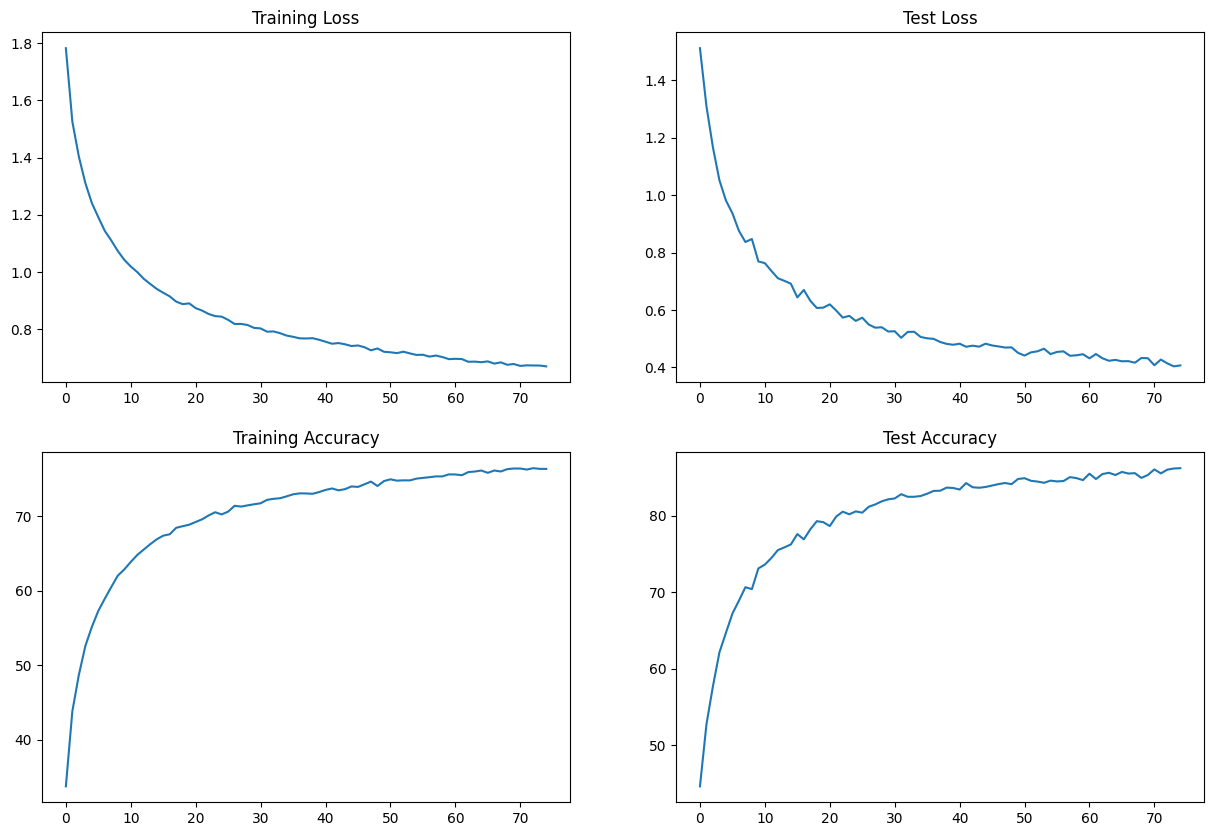

In [6]:
utils.plot_accuracy_loss_graphs(train_losses, train_acc, test_losses, test_acc)

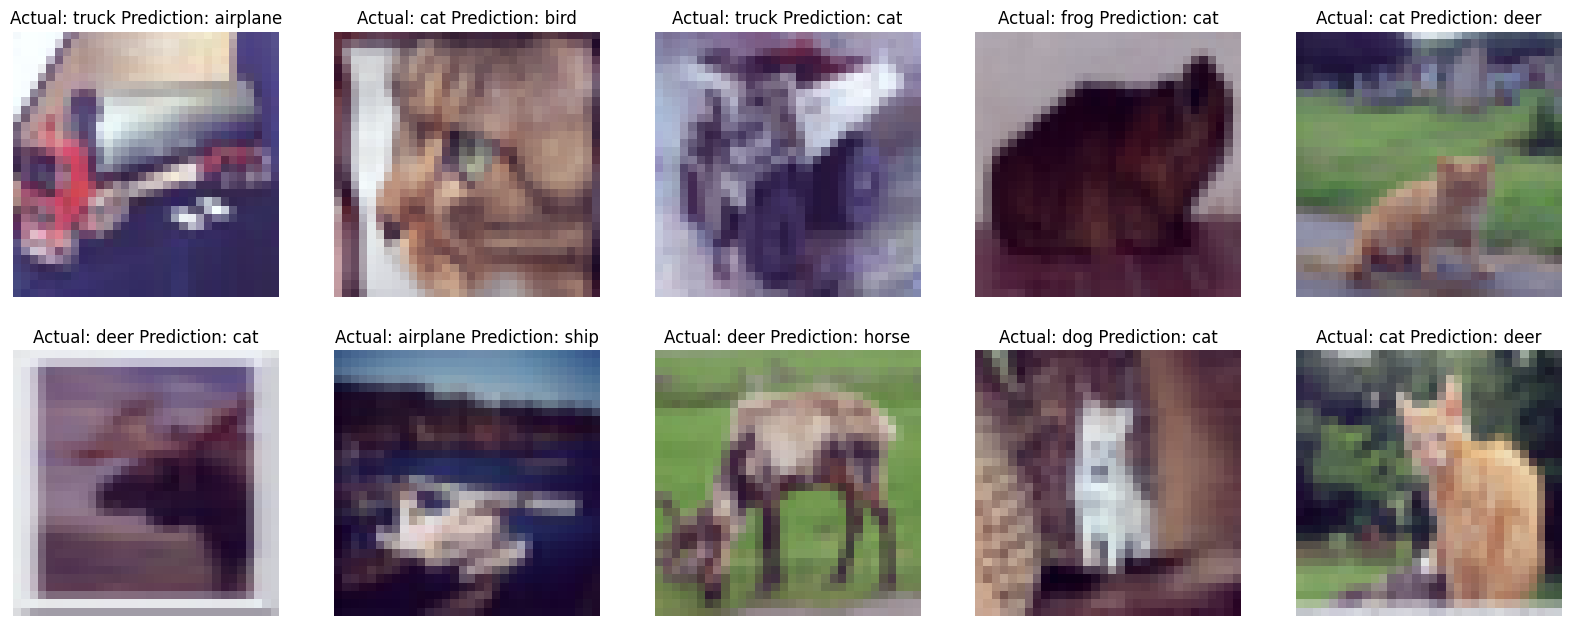

In [7]:
utils.plot_missclassified_images(device, model, test_loader)